# sklearn中的决策树
所在模块sklearn.tree

+ 分类树: tree.DecisionTreeClassifier
+ 回归树: tree.DecisionTreeRegressor
+ 绘图: tree.export.graphviz
+ 高随机版本的分类树: tree.ExtraTreeClassifier
+ 高随机版本的回归树: tree.ExtraTreeRegressor

## 建模流程
1. 实例化, 建立评估模型对象
2. 通过模型接口训练模型
3. 通过模型接口提取需要的信息

## 决策树的基本流程原理:
1. 计算全部特征的不纯度指标
2. 选择不纯度最优的特征来进行分支 (说明该特征对于当前分类判断的效果最好)
3. 重复上面的过程直到用完了所有特征, 或者整体的不纯度指标已经达到最优

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

### 查看数据

In [2]:
# 字典对象
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
X = wine.get('data')
df_x = pd.DataFrame(X, columns=[f'x_{i}' for i in range(13)])
df_x

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
Y = wine.get('target')
df_y = pd.DataFrame(Y, columns=['y'])
df_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [5]:
target_names = wine.get('target_names')
df_target_names = pd.DataFrame(target_names, columns=['target_names'])
df_target_names

,target_names
0,class_0
1,class_1
2,class_2


In [6]:
df_target_names.values.reshape(-1)

array(['class_0', 'class_1', 'class_2'], dtype=object)

In [39]:
# series中使用array属性可以直接获取值, 死代码
df_target_names['target_names'].array

<PandasArray>
['class_0', 'class_1', 'class_2']
Length: 3, dtype: object

In [40]:
# 代码中不要写死代码
df_target_names[df_target_names.columns[0]].array

<PandasArray>
['class_0', 'class_1', 'class_2']
Length: 3, dtype: object

**pd.concat()的使用**
+ 传入一个DataFrame的列表
+ axis=0表示行属性方向的拼接
+ axis=1表示列属性方向的拼接

In [7]:
df_data = pd.concat([df_x, df_y], axis=1)
df_data

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 数据准备

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3)

In [9]:
x_train

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0


In [10]:
x_test

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0


In [11]:
y_train

,y
158,2
78,1
136,2
129,1
173,2
...,...
131,2
155,2
160,2
98,1


In [12]:
y_test

,y
100,1
4,0
166,2
28,0
119,1
144,2
168,2
45,0
49,0
17,0


### 1. 实例化

 + criterion="gini"
    + entropy: 信息熵
    + gini: 基尼系数
 + splitter
    + best: 每次尽可能选择影响最大的特征进行决策树的划分, 但是可能会产生过拟合的问题
    + random: 随机选择特征, 能够缓解过拟合的问题, 但效率更低, 树的深度更深
 + max_depth=None,
 + min_samples_split=2,
 + min_samples_leaf=1,
 + min_weight_fraction_leaf=0.,
 + max_features=None,
 + random_state=30, 可以任意设置一个随机种子, 防止对于同一组训练集和测试集, 决策树产生的结果不同, 如果不设置, 则sklearn实际上会生成一堆的决策树, 然后从中挑选结果最好的返回. 但这样会使得模型不可复现
 + max_leaf_nodes=None,
 + min_impurity_decrease=0.,
 + min_impurity_split=None,
 + class_weight=None,
 + ccp_alpha=0.0

### 2. 训练模型fit

### 3. 导出结果

In [13]:
model = tree.DecisionTreeClassifier(random_state=15)

In [14]:
model = model.fit(x_train, y_train)
result = model.score(x_test, y_test)
result

0.9259259259259259

### 绘制决策树

In [15]:
import graphviz

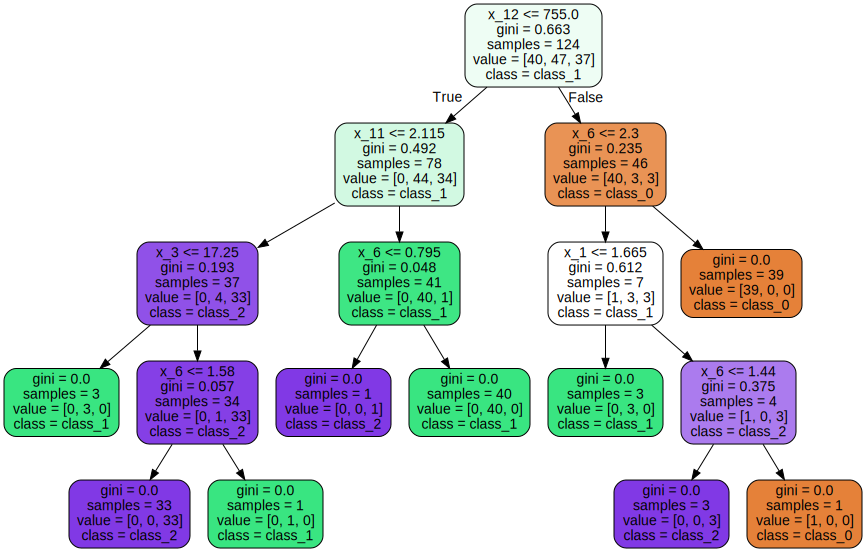

In [16]:
dot_data = tree.export_graphviz(model,
                                # 决策树分类的依据
                                feature_names=df_x.columns,
                                # class_names属性: 分类的名称
                                class_names=df_target_names.values.reshape(-1),
                                # filled属性: 决策树中通过不同的颜色来区分不同的类别
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph

### 获得决策树中的重要特征

In [17]:
s = pd.Series(model.feature_importances_, index=df_x.columns)
s.sort_values(ascending=False)

x_12    0.401947
x_11    0.355933
x_6     0.145093
x_3     0.063155
x_1     0.033872
x_0     0.000000
x_2     0.000000
x_4     0.000000
x_5     0.000000
x_7     0.000000
x_8     0.000000
x_9     0.000000
x_10    0.000000
dtype: float64

In [18]:
[*zip(df_x.columns, model.feature_importances_)]

[('x_0', 0.0),
 ('x_1', 0.03387218782394307),
 ('x_2', 0.0),
 ('x_3', 0.06315462584857971),
 ('x_4', 0.0),
 ('x_5', 0.0),
 ('x_6', 0.14509348039274964),
 ('x_7', 0.0),
 ('x_8', 0.0),
 ('x_9', 0.0),
 ('x_10', 0.0),
 ('x_11', 0.35593301081034207),
 ('x_12', 0.40194669512438547)]

## 其它重要属性
返回测试集数据在决策树中所在叶子节点的序号

In [26]:
model.apply(x_test)

array([ 7,  7,  5, 10,  7,  5,  5, 10, 10, 10,  7,  5,  7,  7, 10, 10,  7,
        7,  7,  7,  5,  7, 10, 10,  7, 10,  5, 10,  7, 10,  7, 10,  2,  5,
        7, 10,  7,  2,  5,  5,  5,  5,  2,  7,  7, 10,  9,  2, 10,  7,  7,
       10,  7, 10], dtype=int64)

返回测试集数据的预测结果

In [27]:
model.predict(x_test)

array([1., 1., 2., 0., 1., 2., 2., 0., 0., 0., 1., 2., 1., 1., 0., 0., 1.,
       1., 1., 1., 2., 1., 0., 0., 1., 0., 2., 0., 1., 0., 1., 0., 1., 2.,
       1., 0., 1., 1., 2., 2., 2., 2., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0.])

## 决策树的剪枝: 优化的核心策略
+ max_depth: 限制树的最大深度
+ min_samples_leaf: 如果一个节点的子节点中的数目小于该值, 则该节点便不会进行分支, 即实际上该节点不会有子节点, 而是作为一个整体, 防止异常情况和过拟合
+ min_samples_split: 上面的参数是先假设分支, 如果子节点数小于设定值则回退, 而当前参数是对当前节点进行判断, 如果当前节点中的样本数少于设定值, 则不会进行分支. 只有当min_samples_split > 2*min_samples_leaf才有效, 否则就画蛇添足了
+ max_features: 限制可以使用的特征数量, 一般在不清楚特征值的重要性的情况下不方便使用
+ min_impurity_decrease: 信息增益过小的分支将不会发生


## 比较不同参数下的结果值

In [19]:
import matplotlib.pyplot as plt


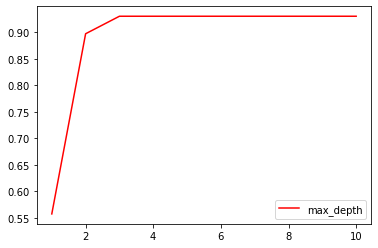

In [23]:
scores = []
for i in range(1, 11):
    model = tree.DecisionTreeRegressor(max_depth=i, random_state=25)
    model = model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)
plt.plot(range(1, 11), scores, color='red', label='max_depth')
plt.legend()
plt.show()